# Изучение рынка заведений общественного питания Москвы
Автор: Никита Логунов

## Цель и задачи

**Цель:**
провести исследовательский анализ рынка общественного питания Москвы. Эти результаты помогут в выборе подходящего инвесторам места, чтобы открыть новое заведение общественного питания.

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных: изучить данные более детально и отобразить взаимосвязи, используя визуализации
4. Сформулировать выводы по проведённому анализу.

## Данные

Доступны данные с заведениями общественного питания Москвы, собранные на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Данные состоят из двух датасетов:

- `rest_info.csv` - содержит информацию о заведениях общественного питания;
- `rest_price.csv` - содержит информацию о среднем чеке в заведениях общественного питания.

### Описание датасета `rest_info.csv`

- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
<br>0 — заведение не является сетевым;
<br>1 — заведение является сетевым.
- `seats` — количество посадочных мест.

### Описание датасета `rest_price.csv`

- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
<br>«Средний счёт: 1000–1500 ₽»;
<br>«Цена чашки капучино: 130–220 ₽»;
<br>«Цена бокала пива: 400–600 ₽». и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
<br>Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
<br>Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
<br>Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
<br>Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
<br>Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
<br>Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

## Структура проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы

## 1. Загрузка данных и знакомство с ними
Начнём с загрузки библиотек и датасетов `rest_info` и `rest_price`. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в двух переменных: `rest_df` и `price_df`.

In [ ]:
# Устанавливаем библиотеку phik
!pip install phik -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 8.6 MB/s eta 0:00:00


In [ ]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [ ]:
# Выгружаем данные в переменные rest_df и price_df
rest_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

Познакомимся с данными датасета `rest_info.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [ ]:
# Выводим первые строки датафрейма на экран
rest_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [ ]:
# Выводим информацию о датафрейме
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания Москвы.

После первичного анализа данных можно сделать следующие выводы:
- Значения в столбце `rating`  имеют тип `float64` - корректно.
- Значения в столбце `chain` имеют тип `int64` и показывают, является ли заведение сетевым, и содержит значения 1 или 0 — размерность этих данных можно оптимизировать.
- Значения в остальных столбцах имеют корректный тип `object`, а нахвание столбца `hours` стоит изменить на `working_hours` для ясности.
- Пропуски содержатся в столбцах `hours` и `seats`. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию. Можно присвоить столбцу категории заведения (`category`) тип `category`, так как данные категориальные.

Теперь познакомимся с данными датасета `clients_information.csv`.

In [ ]:
# Выводим первые строки датафрейма на экран
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [ ]:
# Выводим информацию о датафрейме
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `rest_price.csv` содержит 5 столбцов и 4058 строк, в которых представлена информация о о среднем чеке в заведениях общественного питания. По аналогии с предыдущим датасетом можно отметить, что:

- Пропусков довольно много. В столбце `price` их можно заполнить в соответствии с ценами в столбцах `middle_avg_bill` и `middle_coffee_cup`.
- Пропусков в столбце avg_bill не так много. Если при не будет данных в `middle_avg_bill` и `middle_coffee_cup`, то можно удалить эти строки.
- Пропуски в `middle_avg_bill` и `middle_coffee_cup` связаны с видом заведения и зависят от данных в столбце `avg_bill` - это мы знаем из описания данных, то есть тип MNAR.
- Значения в столбцах соответствуют названиям столбцов и описанию, кроме одного: столбец `price` логичнее переименовать в `price_category`.
- Типы данных соответствуют содержимому, но можно присвоить столбцу `price` тип `category`, так как данные категориальные.

In [ ]:
# Объединим данные двух датасетов в один, с которым вы и продолжим работу
df_full = pd.merge(rest_df, price_df, on='id', how='left')

In [ ]:
# Выводим первые строки полученного датафрейма на экран
df_full.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


In [ ]:
# Проверим размерность получившегося датасета
df_full.shape

(8406, 13)

В объединенном датафрейме 13 столбцов и 8046 строк.
___

## 2. Предобработка данных

### 2.1. Меняем названия, или метки, столбцов датафрейма

In [ ]:
# Передаём методу rename() словарь с новыми названиями столбцов
df_full = df_full.rename(columns={'price': 'price_category',
                                  'hours': 'working_hours'})

In [ ]:
# Выводим названия столбцов датафрейма
df_full.columns

Index(['id', 'name', 'category', 'address', 'district', 'working_hours',
       'rating', 'chain', 'seats', 'price_category', 'avg_bill',
       'middle_avg_bill', 'middle_coffee_cup'],
      dtype='object')

Теперь названия полностью соответствуют содержимому.

In [ ]:
# создаем копию датасета до преобразования для возможности проверить сделанные изменения после предобработки
temp = df_full.copy()
len(temp)

8406

### 2.2. Оптимизируем типы данных

Проведём оптимизацию типов данных: `chain` присвоим целочисленный тип наименьшей разрядности, а столбцу `price_category` присвоим тип `category`, так как данные в нем категориальные.

Для оптимизации будем использовать метод `pd.to_numeric` с аргументом `downcast='integer'` и `astype('category')`.

In [ ]:
# Cтолбцу `chain` присвоим целочисленный тип наименьшей разрядности
df_full['chain'] = pd.to_numeric(df_full['chain'], downcast='integer')

In [ ]:
# Проверяем уникальные значения в категориальных столбцах
for column in ['category', 'price_category', 'working_hours']:
    print(f'Уникальные значения в столбце {column}:')
    print(df_full[column].sort_values().unique())
    print()

Уникальные значения в столбце category:
['бар,паб' 'булочная' 'быстрое питание' 'кафе' 'кофейня' 'пиццерия'
 'ресторан' 'столовая']

Уникальные значения в столбце price_category:
['высокие' 'выше среднего' 'низкие' 'средние' nan]

Уникальные значения в столбце working_hours:
['Нет информации'
 'вт 08:30–17:00; ср,чт 12:00–20:30; пт 08:30–17:00; сб 09:00–16:30'
 'вт 13:00–21:00; ср 11:00–20:00; чт 13:00–21:00; пт-вс 11:00–20:00' ...
 'чт круглосуточно, перерыв 10:00–20:00; сб круглосуточно'
 'чт-вс 20:00–06:00' nan]



Дубликатов нет - значит, можно преобразовать типы данных в категориальные.

In [ ]:
# Столбцу 'price_category' присвоим тип `category`
df_full['price_category'] = df_full['price_category'].astype('category')

In [ ]:
# Столбцу 'category' присвоим тип `category`
df_full['category'] = df_full['category'].astype('category')

In [ ]:
for column in ['rating','middle_avg_bill','middle_coffee_cup','seats']:
    df_full[column] = pd.to_numeric(df_full[column], downcast='float')

In [ ]:
# Проверим типы данных в датафрейме с помощью атрибута dtypes
df_full.dtypes

,0
id,object
name,object
category,category
address,object
district,object
working_hours,object
rating,float32
chain,int8
seats,float32
price_category,category


Типы данных успешно оптимизированы.
___

### 2.3. Проверяем наличие пропусков в данных

При первичном анализе мы обнаружили пропуски в датафреймах `rest_df` и `price_df`. Узнаем абсолютное и относительное количество пропусков в столбцах объединенного датафрейма `df_full`.

In [ ]:
# Применяем метод isna() к датафрейму df_full
df_full.isna().sum()

,0
id,0
name,0
category,0
address,0
district,0
working_hours,536
rating,0
chain,0
seats,3611
price_category,5091


In [ ]:
# Подсчитываем долю строк с пропусками
round(df_full.isna().sum() / df_full.shape[0], 3)

,0
id,0.000
name,0.000
category,0.000
address,0.000
district,0.000
working_hours,0.064
rating,0.000
chain,0.000
seats,0.430
price_category,0.606


In [ ]:
tmp = df_full.copy()            # Делаем копию текущего датасета
missing_stats = pd.DataFrame({'Кол-во пропусков': tmp.isnull().sum(),'Доля пропусков': tmp.isnull().mean().round(4)})
missing_stats = missing_stats[missing_stats['Кол-во пропусков'] > 0]
missing_stats.style.background_gradient(cmap='coolwarm') if not missing_stats.empty else "Пропусков в данных нет"

,Кол-во пропусков,Доля пропусков
working_hours,536,0.063800
seats,3611,0.429600
price_category,5091,0.605600
avg_bill,4590,0.546000
middle_avg_bill,5257,0.625400
middle_coffee_cup,7871,0.936400


In [ ]:
#Посмотрим на те записи, где есть пропуски в поле working_hours
df_full[df_full['working_hours'].isnull()]

,id,name,category,address,district,working_hours,rating,chain,seats,price_category,avg_bill,middle_avg_bill,middle_coffee_cup
38,3746fe879e5b43629512095693ce4113,Ижора,булочная,"Москва, Ижорский проезд, 5А",Северный административный округ,NaN,4.4,0,NaN,NaN,NaN,NaN,NaN
40,e5f4ff8c7196472eac2c980fc6b2e9b2,Кафе,кафе,"Москва, Ижорская улица, 18, стр. 1",Северный административный округ,NaN,3.7,0,NaN,NaN,NaN,NaN,NaN
44,0cb57ea286804a0fbff91ae2cc868d48,Кафетерий,кафе,"Москва, Ангарская улица, 24А",Северный административный округ,NaN,3.8,1,8.0,NaN,NaN,NaN,NaN
56,2b2b60640efb494b8ed4aa3b1313f1cd,Рыба из тандыра,быстрое питание,"Москва, Коровинское шоссе, 46, стр. 5",Северный административный округ,NaN,1.5,0,NaN,NaN,NaN,NaN,NaN
108,a9ad4bd7e15c4b8cb6295c745e5a11c1,Кафе,"бар,паб","Москва, МКАД, 82-й километр, вл18",Северо-Восточный административный округ,NaN,4.2,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8236,4c48d06135d744a5a9d05e56d48d3818,1у,кафе,"Москва, Нагатинская набережная, 40/1к1",Южный административный округ,NaN,3.4,0,NaN,NaN,NaN,NaN,NaN
8375,f2cca1ec4a9348a686f0b9e86dba4e7b,Улица Гурьянова 55,кафе,"Москва, улица Гурьянова, 55",Юго-Восточный административный округ,NaN,4.5,0,NaN,NaN,NaN,NaN,NaN
8378,7cbd1c883e8a4b8e93ef33dfc4cc1c14,Восточно-грузинская кухня,быстрое питание,"Москва, Зеленодольская улица, 32, корп. 3",Юго-Восточный административный округ,NaN,4.3,0,120.0,NaN,NaN,NaN,NaN
8381,ba0d8f9430004985a42e2a5cd6554b9e,Аэлита,кафе,"Москва, Ферганская улица, 8, корп. 2, стр. 1",Юго-Восточный административный округ,NaN,3.8,0,30.0,NaN,NaN,NaN,NaN


In [ ]:
# Посмотрим, в каком количестве строк есть пропуски
df_full[df_full.isnull().any(axis=1)].shape[0]

8406

Пропуски есть в каждой строке, потому что поля `middle_avg_bill` и `middle_coffee_cup` заполняются в зависимости от поля `avg_bill`.

In [ ]:
#Посмотрим на те записи, где есть пропуски в поле price_category
df_full[df_full['price_category'].isnull()]

,id,name,category,address,district,working_hours,rating,chain,seats,price_category,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
11,53ac103717c142f29907080db1f0ce58,Шашлык Шефф,кафе,"Москва, улица Маршала Федоренко, 10с1",Северный административный округ,"ежедневно, 10:00–21:00",4.9,0,NaN,NaN,NaN,NaN,NaN
13,aea18265b0a0415893f1e796b82568fe,Буханка,булочная,"Москва, Базовская улица, 15, корп. 1",Северный административный округ,"ежедневно, 08:00–22:00",4.8,1,180.0,NaN,NaN,NaN,NaN
19,feec6bedccae44cb877d99c13f9aa5d7,Пекарня,булочная,"Москва, Ижорский проезд, 5",Северный административный округ,"ежедневно, круглосуточно",4.4,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0,NaN,NaN,NaN,NaN
8402,ee6bb7c3650e47bd8186fca08eda1091,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0,NaN,NaN,NaN,NaN
8403,62e8c64d4c89467aba608e39ef87616b,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0,NaN,Средний счёт:от 150 ₽,150.0,NaN
8404,06a0db5ecd4842d48cd6350aa923e297,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,NaN,NaN,NaN,NaN


В данных наблюдаются пропуски в следующих столбцах:
- `working_hours`: в 536 строках (6.4% данных) отсутствует информация о часах работы. Записи, где есть пропуски в поле `working_hours`, также отсутсвовали в датафрейме `rest_prices`, так как при присоединении к датафрейму `rest_info` все его поля заполнились пропусками. Достоверно восстановить эти данные мы не можем, а при удалении сток с пропусками в  `working_hours` мы потеряем даныне по, например, районам и категориям, которые должны проанализировать. Поэтому не будем ничего делать с  пропусками в столбце `working_hours`.
- `seats`: в 3611 строках (43% данных) отсутствует информация о количестве мест.
- `price_category`: в 5091 строке (60.6% данных) отсутствуют данные о ценовой категории заведения. Не удается обнаружить взаимосвязи между пропусками в `price_category` и другими полями. В последующих подсчетах корреляции пропуски не будут учитываться, если мы их оставим.
- `avg_bill`: в 4590 строках (54.6% данных) отсутствуют данные о сумме среднего чека.
- `middle_avg_bill`: в 5257 строках (62.5% данных) отсутствует оценка среднего чека. Ее нет во всех строках, где  есть пропуски в поле `avg_bill`, а также где есть данные в поле `middle_coffee_cup`. Оставляем пропуски как есть.
- `middle_coffee_cup`: в 7871 строках (93.6% данных) отсутствует оценка чашки капучино. Аналогично, ее нет во всех строках, где  есть пропуски в поле `avg_bill`, а также где есть данные в поле `middle_avg_bill`. Оставляем пропуски как есть.

В столбцах `seats`, `price_category`, `avg_bill` пропусков довольно много, и достоверно их заполнить не представляется возможным, поэтому оставим их как есть.

### 2.4. Явные и неявные дубликаты в данных

Проверим данные на наличие явных и неявных дубликатов. Начнём с полных дубликатов:

In [ ]:
# Запомним количестово строк в датафрейме до удаления дубликов в переменную initial_row_count
initial_row_count = len(df_full)
initial_row_count

8406

In [ ]:
# Проверяем полные дубликаты в датафрейме
df_full.duplicated().sum()

np.int64(0)

В датафрейме нет полных дубликатов строк. Проверим неявные дубликаты — значения по `id` заведений должны быть уникальными, то есть каждая строка в данных — уникальное заведение:

In [ ]:
# Проверяем неявные дубликаты в датафрейме
df_full.duplicated(subset='id').sum()

np.int64(0)

In [ ]:
# Приведем данные в столбцах 'name' и 'address' к нижнему регистру и удалим пробелы по краям строки
# Проверяем неявные дубликаты в датафрейме
df_full['name'] = df_full['name'].str.lower().str.strip()
df_full['address'] = df_full['address'].str.lower().str.strip()
df_full.duplicated(subset=['name', 'address']).sum()

np.int64(4)

In [ ]:
# Посмотрим на обнаруженные дубликаты
df_full[df_full.duplicated(subset=['name', 'address'], keep=False)].sort_values(by='name')

,id,name,category,address,district,working_hours,rating,chain,seats,price_category,avg_bill,middle_avg_bill,middle_coffee_cup
1430,62608690e9cc464fbcd980cfd552e334,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188.0,NaN,NaN,NaN,NaN
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188.0,NaN,NaN,NaN,NaN
189,072032ce16dc47bfbc63b672c75bd371,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 09:00–23:00",3.2,0,NaN,NaN,NaN,NaN,NaN
215,897ddbc6746c4388b19dc8a9fcdbb488,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 10:00–22:00",3.2,0,NaN,NaN,NaN,NaN,NaN
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,раковарня клешни и хвосты,ресторан,"москва, проспект мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",4.4,0,150.0,NaN,NaN,NaN,NaN
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарня клешни и хвосты,"бар,паб","москва, проспект мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150.0,NaN,NaN,NaN,NaN
3091,3c2a73ea79a04be48858fab3685f2f37,хлеб да выпечка,булочная,"москва, ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",4.1,1,276.0,NaN,NaN,NaN,NaN
3109,d3116844e4e048f99614eb30be3214e0,хлеб да выпечка,кафе,"москва, ярцевская улица, 19",Западный административный округ,NaN,4.1,0,276.0,NaN,NaN,NaN,NaN


Действительно, названия и адреса совпадают, а вот график работы и категория могут отличаться. Удалим дубликаты и оставим последнюю запись.

In [ ]:
# Запишем количество и долю дубликатов в переменные
count_duplicates = df_full.duplicated(subset=['name', 'address']).sum()
duplicates_share = round(count_duplicates / initial_row_count * 100, 2)
print(f'Количество удаляемых дубликатов: {count_duplicates}')
print(f'Процент удаляемых дубликатов: {duplicates_share}')

Количество удаляемых дубликатов: 4
Процент удаляемых дубликатов: 0.05


In [ ]:
# Удаляем дубликаты в столбцах 'name' и 'address'
df_full = df_full.drop_duplicates(subset=['name', 'address'], keep='last')

In [ ]:
# Проверяем неявные дубликаты в датафрейме по столбцу 'name'
df_full.duplicated(subset='name').sum()

np.int64(2890)

In [ ]:
# Посмотрим на обнаруженные дубликаты по столбцу 'name'
df_full[df_full.duplicated(subset='name', keep=False)].sort_values(by='name')

,id,name,category,address,district,working_hours,rating,chain,seats,price_category,avg_bill,middle_avg_bill,middle_coffee_cup
430,56eaa8b3b94d45ad92e205890c308a50,10 идеальных пицц,ресторан,"москва, улица свободы, 48, стр. 1",Северо-Западный административный округ,"ежедневно, круглосуточно",4.3,1,110.0,NaN,NaN,NaN,NaN
5069,f44f7e48e5d6423fb432a88549f3040c,10 идеальных пицц,ресторан,"москва, улица большие каменщики, 9се",Центральный административный округ,"ежедневно, 11:45–22:30",4.3,1,NaN,NaN,NaN,NaN,NaN
7590,142045f5c4ba43508ba2893bb8fc1dbd,10 идеальных пицц,ресторан,"москва, улица паустовского, 6, корп. 1",Юго-Западный административный округ,"ежедневно, 11:45–22:30",4.3,1,150.0,NaN,NaN,NaN,NaN
3282,0988990ab765491e8d376123bdc904ac,18 грамм,кофейня,"москва, шелепихинская набережная, 34, корп. 2",Северо-Западный административный округ,"пн-пт 08:00–22:00; сб,вс 09:00–22:00",4.6,1,NaN,NaN,NaN,NaN,NaN
2267,179f54ce9ea44107883477085689eb1c,18 грамм,кофейня,"москва, погонный проезд, 3а, корп. 5",Восточный административный округ,"ежедневно, 08:00–22:00",4.4,1,252.0,средние,Цена чашки капучино:100–200 ₽,NaN,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6690,f9e4ec2d1e5946cf83c9564b2d06acd6,японская кухня,ресторан,"москва, проспект вернадского, 121, корп. 1",Западный административный округ,NaN,4.4,1,1288.0,NaN,NaN,NaN,NaN
8226,7712b8101a3f483e84e3a7630d7107f3,ё-ланч,столовая,"москва, дубининская улица, 57, стр. 4",Южный административный округ,пн-пт 09:00–17:00,3.9,1,64.0,NaN,NaN,NaN,NaN
8181,5a4a51f61370453790f2e6d4e3ed5b38,ё-ланч,столовая,"москва, новоостаповская улица, 5, стр. 3",Юго-Восточный административный округ,"ежедневно, 09:00–18:00",4.1,1,NaN,средние,NaN,NaN,NaN
7301,f1ff19cd13084d2aa4df2c9b7a74c714,ёрш,"бар,паб","москва, улица перерва, 58",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.4,1,55.0,выше среднего,Средний счёт:1000–1500 ₽,1250.0,NaN


Названия заведений могут быть одинаковыми, если это сеть. Проверим записи со значениями в столбце `chain` == 0, то есть заведения, не являющиеся сетью.

In [ ]:
# Создадим датафрейм с дубликатами в названии заведения и выведем те строки, где заведения не отмечены как сеть
filtered_df = df_full[df_full.duplicated(subset='name', keep=False)]
filtered_df[filtered_df['chain'] == 0].sort_values(by='name')

,id,name,category,address,district,working_hours,rating,chain,seats,price_category,avg_bill,middle_avg_bill,middle_coffee_cup
1442,f5e9f3b1e90e44239e01afc8d2e26c52,abc coffee roasters,кофейня,"москва, ленинградский проспект, 72, корп. 1",Северный административный округ,"пн-пт 08:00–22:00; сб,вс 10:00–22:00",4.5,0,625.0,средние,Цена чашки капучино:220–270 ₽,NaN,245.0
6371,8a042f26c657475b93bcef2ff8b13b08,bb grill,"бар,паб","москва, автозаводская улица, 18",Южный административный округ,"ежедневно, 10:00–23:00",4.4,0,455.0,выше среднего,Средний счёт:1700 ₽,1700.0,NaN
2694,ba41f7a021434889835f8608358095d9,bb grill,"бар,паб","москва, семёновская площадь, 1",Восточный административный округ,"ежедневно, 12:00–23:00",4.6,0,100.0,высокие,Средний счёт:1500–2500 ₽,2000.0,NaN
7365,858fa55a27194c4e94aa55d349270b4d,burger club,ресторан,"москва, улица борисовские пруды, 26",Южный административный округ,"ежедневно, 10:00–22:00",4.3,0,5.0,NaN,Средний счёт:250–500 ₽,375.0,NaN
3043,4e22e26fdd1d4798a7f4bb0edf71ff33,carrots and beans,кофейня,"москва, ярцевская улица, 31",Западный административный округ,"пн-пт 09:00–20:00; сб,вс 10:00–20:00",4.3,0,NaN,средние,Цена чашки капучино:250–270 ₽,NaN,260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5548,9395ff40c9c748af966a1cba4e27286b,шашлычная,кафе,"москва, авиамоторная улица, 39",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.8,0,NaN,NaN,NaN,NaN,NaN
5930,798fa68060cf42c8bbcf5f5ec62dda9c,шашлычная,кафе,"москва, улица вавилова, 5, стр. 6",Южный административный округ,"ежедневно, 10:00–22:00",4.3,0,NaN,средние,Средний счёт:300–600 ₽,450.0,NaN
5982,e788e6aa7d8743d4ac7d4e88cc522e13,шашлычная,"бар,паб","москва, новочерёмушкинская улица, 12",Юго-Западный административный округ,"ежедневно, 11:00–23:00",4.3,0,30.0,средние,NaN,NaN,NaN
6516,0e045ed7d4bf45a482eae7edc26e2353,шашлычная,кафе,"москва, заозёрная улица, 14",Восточный административный округ,"ежедневно, 09:00–21:00",4.4,0,NaN,NaN,NaN,NaN,NaN


Эти дубликаты мы все-таки не будем удалять, так как это явно разные существующие заведения. Это могут быть либо просто совпадающие названия ("шашлычная" — очень типичное название), либо небольшие сети на 2-3 заведения, которым, возможно, по ошибке или невнимательности не присвоен статус сети.

Создадим новый столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7. Напишем для этого функцию `create_is_24_7()`.

In [ ]:
# Определяем функцию, которая создаст новый столбец с бинарным признаком в зависимости от наличия  "ежедневно, круглосуточно" в столбце 'working_hours'
def create_is_24_7(x):
    word='ежедневно, круглосуточно'
    if word in str(x):
        return True
    return False

In [ ]:
# Создаём столбец is_24_7 с помощью функции create_is_24_7
df_full['is_24_7'] = df_full['working_hours'].apply(create_is_24_7)

In [ ]:
#Посчитаем, сколько заведений работает 24/7
is_24_7_count = df_full['is_24_7'].sum()
is_24_7_count

np.int64(730)

In [ ]:
# В процентах:
f'Процент заведений, работающих 24/7: {round(is_24_7_count / len(df_full) *100, 1)}%'

'Процент заведений, работающих 24/7: 8.7%'

In [ ]:
# Проверим сколько удалено строк датасета
a, b = len(temp), len(df_full)
print(" Было строк в исходном датасете", a,
      '\n', "Осталось строк в датасете после обработки", b,
      '\n', "Удалено строк в датасете после обработки", a-b,
      '\n', "Процент потерь", round((a-b)/a*100, 2))

 Было строк в исходном датасете 8406 
 Осталось строк в датасете после обработки 8402 
 Удалено строк в датасете после обработки 4 
 Процент потерь 0.05


**Вывод по результатам предобработки:**
В процессе предобработки данных датафрейма `df_full`  были выполнены следующие задачи:
- Двум столбцам были присвоены более логичные названия `'price_category'`, `'working_hours'`;
- Для столбцов `rating`, `middle_avg_bill`, `middle_coffee_cup`, `seats` понижена разрядность.
- Столбцу `chain` присвоили целочисленный тип наименьшей разрядности, а столбцу `price_category` присвоили тип `category`, так как данные в нем категориальные;
- Пропуски обнаружены в столбце `working_hours` (6,4% данных), мы их оставили, так как заполнить их достовоерно не можем, и удалить тоже не можем, ведь данные нам нужны для дальнейшего анализа;
- В столбцах `seats`, `price_category`, `avg_bill` пропусков довольно много, и достоверно их заполнить не представляется возможным, поэтому оставим их как есть;
- Пропуски есть в каждой строке датафрейма (в полях  `middle_avg_bill` и/или `middle_coffee_cup`, так как они заполняются в зависимости от поля `avg_bill`). Эти пропуски мы тоже не трогаем;
- Названия и адреса заведений совпали в 4 строках - очевидно, неявные дубликаты. Мы их удалили. Количество удаленных строк: 4 (0.05% данных);
- Дубликаты по названиям было решено не удалять, так как есть популярные названия (напрмер, шашлычная) и в принципе заведения могут иметь одинаковые названия и быть расположены по разным адресам (или могут быть сетью);
- Создали новый столбец `'is_24_7'` и вычислили количество заведений, работающих 24/7 - их 730 (8.7%).

## 3. Исследовательский анализ данных

### 3.1. Исследование категорий заведений
Исследуем, какие категории заведений представлены в данных и количество объектов общественного питания по каждой категории.

In [ ]:
# Проверяем распределение данных по значениям столбца category
print('Распределение данных по значениям столбца category:')
df_full['category'].value_counts()

Распределение данных по значениям столбца category:


,count
category,
кафе,2377
ресторан,2041
кофейня,1413
"бар,паб",765
пиццерия,633
быстрое питание,603
столовая,315
булочная,255


In [ ]:
# Проверяем распределение заведений в  относительных значениях в  столбце category
print('Распределение данных по значениям столбца category в  относительных значениях:')
df_full['category'].value_counts(normalize=True)

Распределение данных по значениям столбца category в  относительных значениях:


,proportion
category,
кафе,0.282909
ресторан,0.242918
кофейня,0.168174
"бар,паб",0.091050
пиццерия,0.075339
быстрое питание,0.071769
столовая,0.037491
булочная,0.030350


Для визуального анализа такого распределения можно использовать столбчатые диаграммы. Визуализируем распределение в столбце `category`:

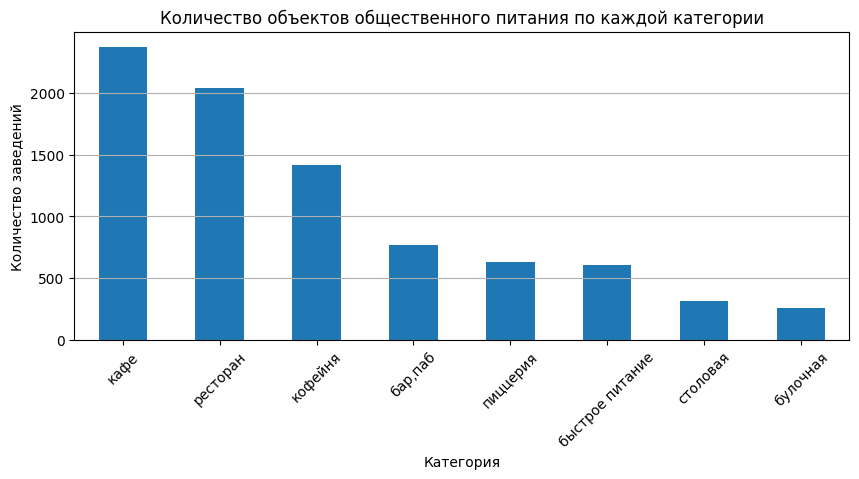

In [ ]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 4))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df_full['category'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=45, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Количество объектов общественного питания по каждой категории'
)

# Настраиваем оформление графика
plt.xlabel('Категория')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid(axis='y')

# Выводим график
plt.show()

Топ-3 категорий заведений: `кафе`, `ресторан` и `кофейня` - эти категории самые популярные. `Бар,паб`, `пиццерия` и `быстрое питание` - категории со средним количеством заведений. `Столовая` и `булочная` - самые непопулярные категории.
___

### 3.2. Исследование административных районов Москвы

Исследуем, какие административные районы Москвы присутствуют в данных, а также распределение количества заведений по административным районам Москвы. И отдельно распределение заведений каждой категории в Центральном административном округе Москвы.

In [ ]:
# Проверяем распределение данных по значениям столбца district
print('Распределение данных по значениям столбца district:')
df_full['district'].value_counts()

Распределение данных по значениям столбца district:


,count
district,
Центральный административный округ,2242
Северный административный округ,898
Южный административный округ,892
Северо-Восточный административный округ,890
Западный административный округ,850
Восточный административный округ,798
Юго-Восточный административный округ,714
Юго-Западный административный округ,709
Северо-Западный административный округ,409


In [ ]:
# Проверяем распределение данных по относительным значениям столбца district
print('Распределение данных по относителльным значениям столбца district:')
df_full['district'].value_counts(normalize=True)

Распределение данных по относителльным значениям столбца district:


,proportion
district,
Центральный административный округ,0.266841
Северный административный округ,0.106879
Южный административный округ,0.106165
Северо-Восточный административный округ,0.105927
Западный административный округ,0.101166
Восточный административный округ,0.094977
Юго-Восточный административный округ,0.084980
Юго-Западный административный округ,0.084385
Северо-Западный административный округ,0.048679


Визуализируем распределение в столбце `district` с помощью столбчатой горизонтальной диаграмы (именно горизонтальной - чтобы длинные названия районов отображались горизонтально и хорошо читались):

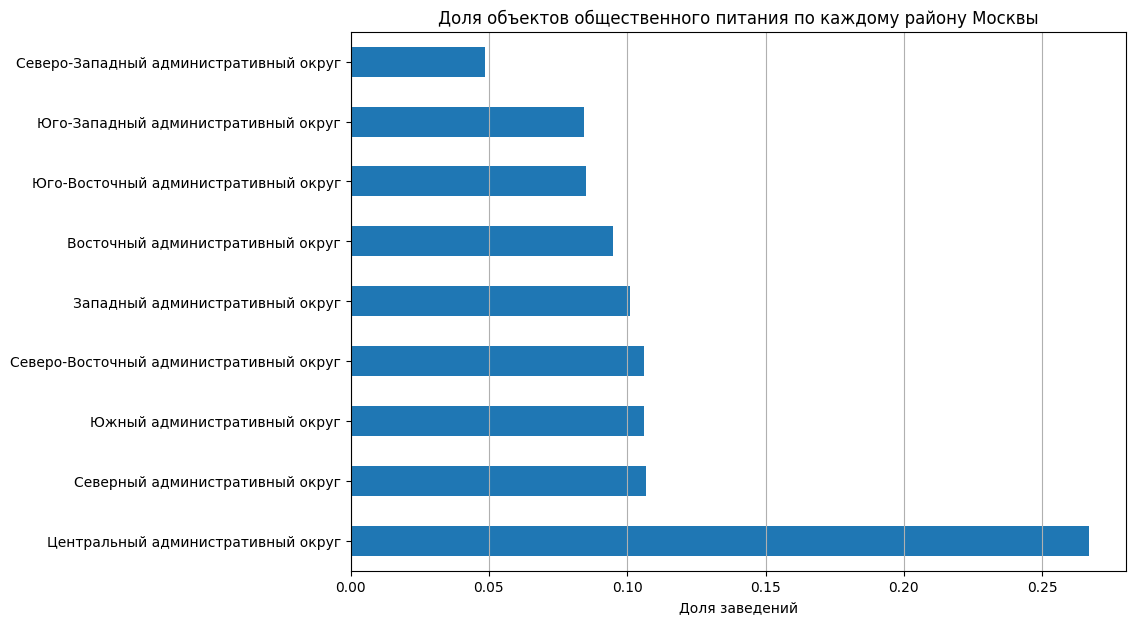

In [ ]:
plt.figure(figsize=(10,7))

df_full['district'].value_counts(normalize=True).plot(
               kind='barh',
               rot=0,
               legend=False,
               title=f'Доля объектов общественного питания по каждому району Москвы'
)

plt.xlabel('Доля заведений')
plt.ylabel('')

plt.grid(axis='x')

plt.show()

Проанализируем количество заведений Центрального административного округа по кагерориям заведений в абсолютных и относительных значениях:

In [ ]:
# Проверяем распределение данных по категориям заведений Центрального административного округа в абсолютных значениях
print('Распределение данных по категориям заведений Центрального административного округа в абсолютных значениях:')
df_full.loc[df_full['district'] == 'Центральный административный округ', 'category'].value_counts()

Распределение данных по категориям заведений Центрального административного округа в абсолютных значениях:


,count
category,
ресторан,670
кафе,464
кофейня,428
"бар,паб",364
пиццерия,113
быстрое питание,87
столовая,66
булочная,50


In [ ]:
# Проверяем распределение данных по категориям заведений Центрального административного округа в относительных значениях
print('Распределение данных по категориям заведений Центрального административного округа в относительных значениях:')
df_full.loc[df_full['district'] == 'Центральный административный округ', 'category'].value_counts(normalize=True)

Распределение данных по категориям заведений Центрального административного округа в относительных значениях:


,proportion
category,
ресторан,0.298840
кафе,0.206958
кофейня,0.190901
"бар,паб",0.162355
пиццерия,0.050401
быстрое питание,0.038805
столовая,0.029438
булочная,0.022302


Построим столбчатую диаграму для визуальзации распределения заведений каждой категории в Центральном административном округе Москвы:

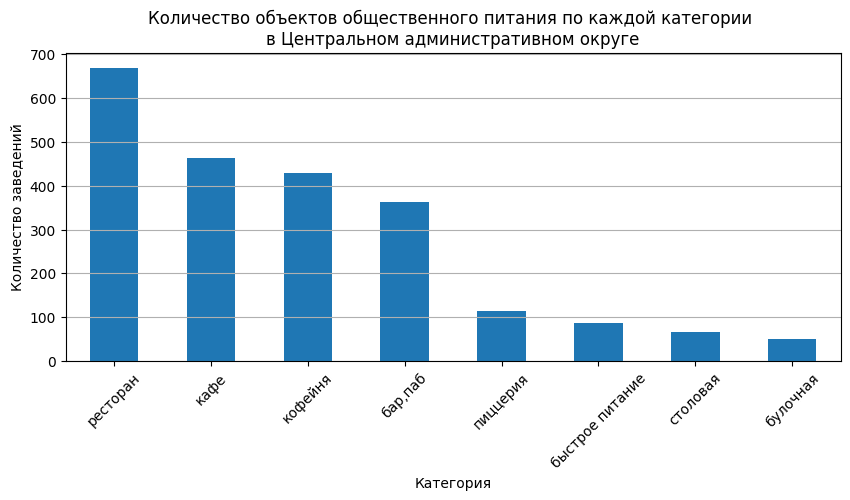

In [ ]:
plt.figure(figsize=(10,4))
df_full.loc[df_full['district'] == 'Центральный административный округ', 'category'].value_counts().plot(
               kind='bar',
               rot=45,
               legend=False,
               title=f'Количество объектов общественного питания по каждой категории \nв Центральном административном округе'
)

plt.xlabel('Категория')
plt.ylabel('Количество заведений')

plt.grid(axis='y')

plt.show()

Больше всего объектов общественного питания находится в `Центральном административном округе Москвы` (2242 шт, или 27%) - это практически в 2.5 раза больше, чем в `Северном административном округе`, который занимает 2 место. А самый малочисленный `Северо-Западный административный округ` - всего 409 заведений (около 5%).

Среди заведений `Центрального административного округа` больше всего `ресторанов` и примерно одиноковое количество `кафе`, `кофеен` и `баров,пабов`. Доля `баров,пабов` здесь значительно выше (наравне с `кофейнями` и `кафе`), чем в Москве в среднем. Это логично, ведь бары и пабы часто располагаются в центре города.
___

### 3.3. Изучение соотношения сетевых и несетевых заведений

Изучим соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения.

In [ ]:
# Проверяем распределение данных по значениям столбца chain
print('Распределение данных по значениям столбца chain:')
df_full['chain'].value_counts(normalize=True)

Распределение данных по значениям столбца chain:


,proportion
chain,
0,0.618662
1,0.381338


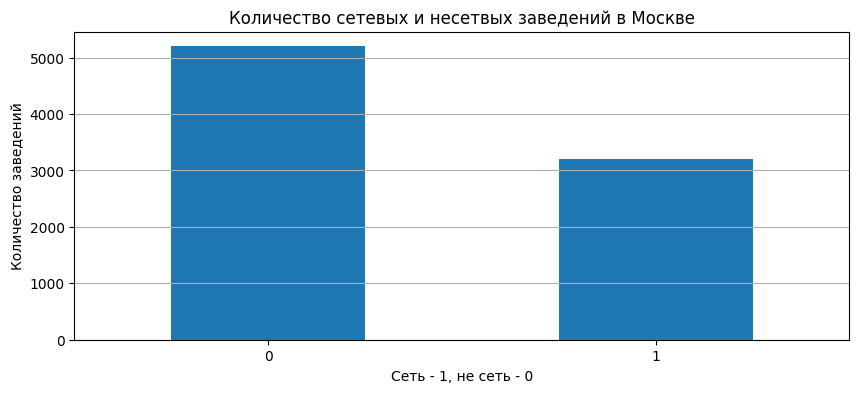

In [ ]:
plt.figure(figsize=(10,4))
df_full['chain'].value_counts().plot(
               kind='bar',
               rot=0,
               legend=False,
               title=f'Количество сетевых и несетвых заведений в Москве'
)

plt.xlabel('Сеть - 1, не сеть - 0')
plt.ylabel('Количество заведений')

plt.grid(axis='y')

plt.show()

Более 5000 заведений не принадлежит сети, что составляет 62% от общего количества заведений в Москве.

Посмотрим на данные в разрезе категорий:

/tmp/ipython-input-53-1477657208.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_full.groupby('category')['chain'].mean()


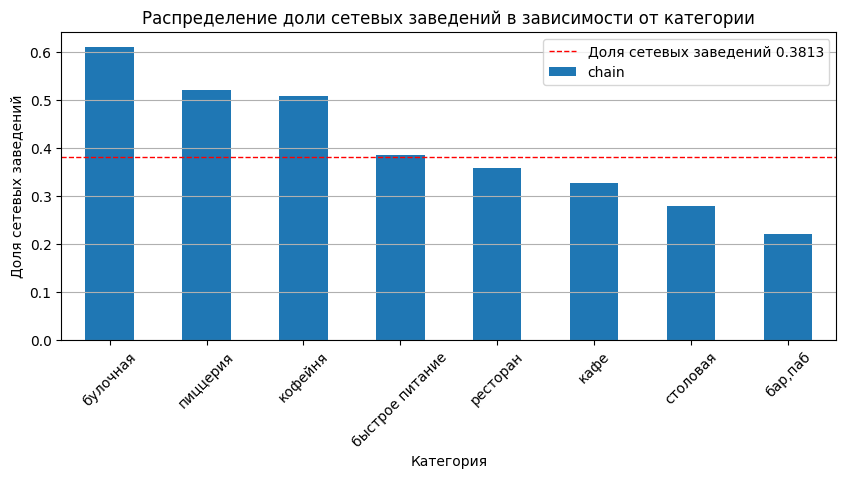

In [ ]:
grouped = df_full.groupby('category')['chain'].mean()
grouped.sort_values(ascending=False).plot(kind='bar',
               title=f'Распределение доли сетевых заведений в зависимости от категории',
               legend=True,
               ylabel='Доля сетевых заведений',
               xlabel='Категория',
               rot=45,
               figsize=(10, 4))
# Рассчитываем среднее значение по доле сетевых заведений
mean_chain_share = df_full['chain'].mean()

# Наносим на график линию с средним значением доли сетевых заведений
plt.axhline(mean_chain_share, # Данные, по которым строится линия
            color='red', # Цвет линии
            linestyle='--', # Стиль линии
            linewidth=1, # Ширина линии
            label=f'Доля сетевых заведений {round(mean_chain_share,4)}')
plt.grid(axis='y')
plt.legend()

# Выводим график
plt.show()

Чаще всего сетевыми заведениями являются `булочные` (более 60%). Среди `кофеен` и `пиццерий` около половины сетевых заведений. В остальных категориях заведений доля сетей ниже или равна средней доле сетей по всем заведениям. А меньше всего сетей среди `баров и пабов` - 22%.
___

### 3.4. Исследование количества посадочных мест в заведениях

Исследуем количество посадочных мест в заведениях и встречаются ли в данных аномальные значения или выбросы.

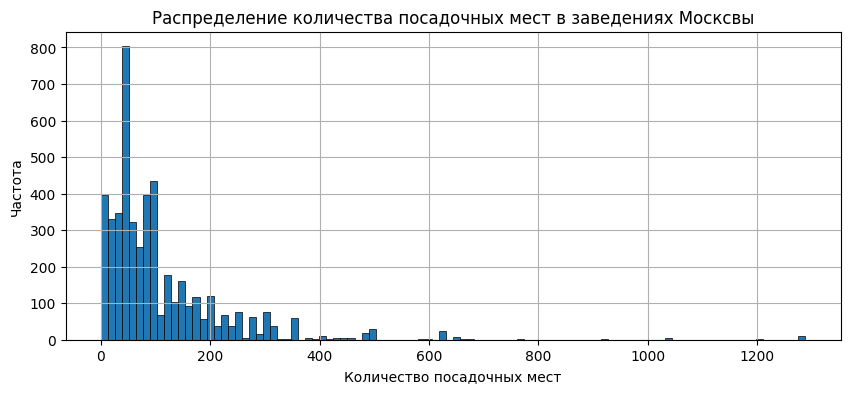

In [ ]:
df_full.hist('seats',
             bins=100,
             edgecolor='black',
             linewidth=0.5,
             figsize=(10,4)
            )
plt.title('Распределение количества посадочных мест в заведениях Москсвы')
plt.ylabel('Частота')
plt.xlabel('Количество посадочных мест')

plt.show()

Посмотрим на основные статистические показатели по столбцу `seats`:

In [ ]:
df_full['seats'].describe()

,seats
count,4792.000000
mean,108.361435
std,122.841225
min,0.000000
25%,40.000000
50%,75.000000
75%,140.000000
max,1288.000000


Медиана сильно меньше среднего, поэтому можно зафиксировать выбросы. Построим диаграму размаха, чтобы посмотреть на них и проанализируем, аномальные ли все-таки это значения.

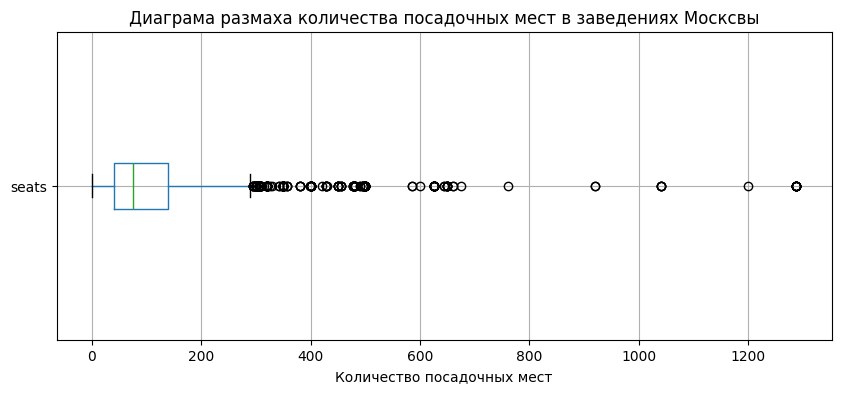

In [ ]:
df_full.boxplot(column='seats', vert=False, grid=True, figsize=(10,4))
plt.title('Диаграма размаха количества посадочных мест в заведениях Москсвы')
plt.xlabel('Количество посадочных мест')

plt.show()

Посмотрим на строки с самыми высокими значениями в столбце `seats`:

In [ ]:
df_full.sort_values(by='seats', ascending=False).head(15)

,id,name,category,address,district,working_hours,rating,chain,seats,price_category,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
6524,c93d20f53072495c9cf2e489914cb8a5,ян примус,ресторан,"москва, проспект вернадского, 121, корп. 1",Западный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–02:00; вс 12:00...",4.5,1,1288.0,выше среднего,Средний счёт:1500 ₽,1500.0,NaN,False
6574,5925d9677fe24778a27e35ccd88c0a2d,мюнгер,пиццерия,"москва, проспект вернадского, 97, корп. 1",Западный административный округ,"пн-пт 08:00–21:00; сб,вс 10:00–21:00",4.8,1,1288.0,NaN,NaN,NaN,NaN,False
6518,fbf22d98b62a47fbb2a71be3545f16b2,delonixcafe,ресторан,"москва, проспект вернадского, 94, корп. 1",Западный административный округ,"ежедневно, круглосуточно",4.1,0,1288.0,высокие,Средний счёт:1500–2000 ₽,1750.0,NaN,True
6684,6287fb9811434558a4ada0ae08be9c04,пивной ресторан,"бар,паб","москва, проспект вернадского, 121, корп. 1",Западный административный округ,NaN,4.5,0,1288.0,NaN,NaN,NaN,NaN,False
6690,f9e4ec2d1e5946cf83c9564b2d06acd6,японская кухня,ресторан,"москва, проспект вернадского, 121, корп. 1",Западный административный округ,NaN,4.4,1,1288.0,NaN,NaN,NaN,NaN,False
6641,0508ba663a4c42d1b5068e51afcc26ef,one price coffee,кофейня,"москва, проспект вернадского, 84, стр. 1",Западный административный округ,"ежедневно, 08:30–20:00",4.3,1,1288.0,NaN,NaN,NaN,NaN,False
6658,19a223ff04f74af7a12bd87b77ce468b,гудбар,"бар,паб","москва, проспект вернадского, 97, корп. 1",Западный административный округ,"пн-пт 11:00–23:00; сб,вс 13:00–23:00",4.1,0,1288.0,средние,Средний счёт:700 ₽,700.0,NaN,False
6771,6f85ea6419c941208f7deee9194383e1,точка,кафе,"москва, проспект вернадского, 84, стр. 1",Западный административный округ,NaN,4.7,1,1288.0,NaN,NaN,NaN,NaN,False
6807,ba5a32dfee6c4661a25c0ea2d39f393d,loft-cafe академия,кафе,"москва, проспект вернадского, 84, стр. 1",Западный административный округ,пн-пт 09:00–20:00; сб 09:00–16:00,3.6,0,1288.0,NaN,NaN,NaN,NaN,False
6838,0b8062d352c84a65bca70622eecbc745,alternative coffee,кофейня,"москва, проспект вернадского, 41, стр. 1",Западный административный округ,"пн-пт 09:00–21:00; сб,вс 09:00–22:00",4.3,0,1288.0,NaN,NaN,NaN,NaN,False


Для Москвы заведения на 1288 мест - не аномальный случай. Вполне реально встретить такие большие заведения в столице России. Так что будем считать эти записи экстремальными значениями, которые являются частью естественного распределения данных.

Приведем для каждой категории заведений наиболее типичное для нее количество посадочных мест. Для этого вычислим медиану количества мест по каждой категории и построим столбчатую диаграму.

In [ ]:
df_full.groupby('category')['seats'].median().sort_values(ascending=False)

/tmp/ipython-input-58-1527495795.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_full.groupby('category')['seats'].median().sort_values(ascending=False)


,seats
category,
ресторан,86.0
"бар,паб",82.5
кофейня,80.0
столовая,75.5
быстрое питание,65.0
кафе,60.0
пиццерия,55.0
булочная,50.0


/tmp/ipython-input-59-2492309126.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_seats = df_full.groupby('category')['seats'].median().sort_values(ascending=False)


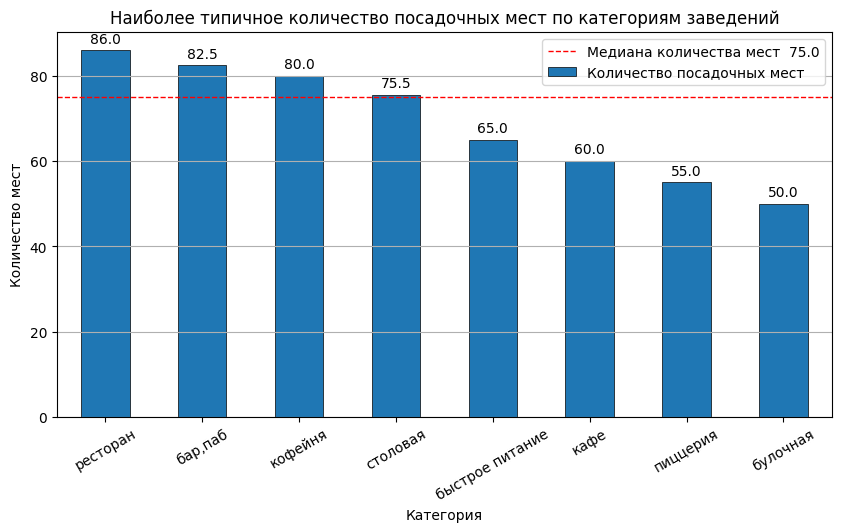

In [ ]:
median_seats = df_full.groupby('category')['seats'].median().sort_values(ascending=False)
ax = median_seats.plot(
               kind='bar',
               title=f'Наиболее типичное количество посадочных мест по категориям заведений',
               legend=True,
               ylabel='Количество мест',
               xlabel='Категория',
               label='Количество посадочных мест',
               rot=30,
               figsize=(10, 5),
               edgecolor='black',
               linewidth=0.5
)

# Добавление подписей над столбцами
for i, v in enumerate(median_seats):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

# Рассчитываем медиану количества мест среди всех категорий
mean_seats_share = df_full['seats'].median()

# Наносим на график линию с медианой количества мест среди всех категорий
plt.axhline(mean_seats_share,
            color='red',
            linestyle='--',
            linewidth=1,
            label=f'Медиана количества мест  {round(mean_seats_share,1)}')

plt.grid(axis='y')
plt.legend()

plt.show()

/tmp/ipython-input-60-2551541128.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order=tmp.groupby('category')['seats'].median().sort_values(ascending=False).index
/tmp/ipython-input-60-2551541128.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category',


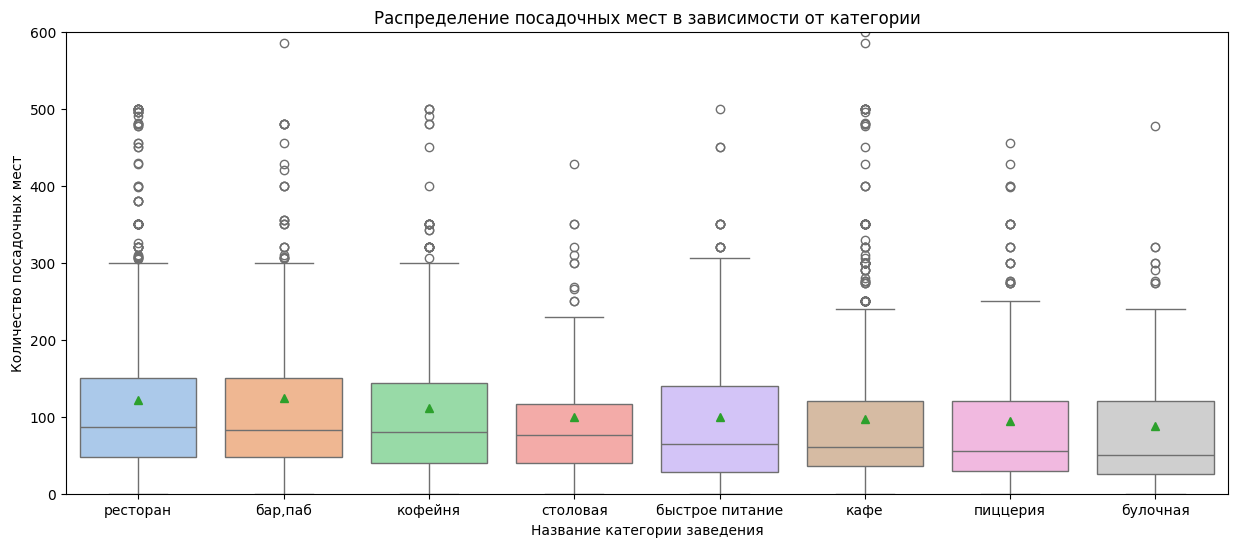

In [ ]:
tmp = df_full.copy()  # Создаем копию датасета, что бы не работать с исходным

# Создаем список категорий сортированный по медианам
order=tmp.groupby('category')['seats'].median().sort_values(ascending=False).index

# Построение диаграммы размаха с использованием seaborn
plt.figure(figsize=(15, 6))
sns.boxplot(x='category',
            y='seats',
            data=tmp,
            showmeans=True,  # Зеленые треугольники показывают среднее значение
            order=order,
            palette='pastel').set(title = 'Распределение посадочных мест в зависимости от категории',
                             xlabel = 'Название категории заведения',
                             ylabel = 'Количество посадочных мест',
                             ylim=(0, 600))   # Ограничиваем вывод для того, чтобы боксплоты были крупными,
                                              # если убрать, то будут видны все выбросы
# Отображение диаграммы
plt.show()

Выше всего наиболее типичное количество посадочных мест в `ресторане` (86 мест), что логично. А ниже всего - в `булочной` (50 мест). Чаще всего в `ресторанах`, `барах,пабах` и `кофейнях` мест больше, чем их обычно есть в заведениях Москвы.

Меньше всего выбросов количества посадочных мест в категориях `столовая`, `быстрое питание` и `булочная`. Вероятно, такие заведения более типичны по своей планировке и формату, чего точно нельзя сказать о `кафе` - кафе могут быть совершенно разных размеров и вместительности.
___

### 3.5. Исследуование рейтинга заведений по категориям
Исследуем рейтинг заведений и визуализируем распределение средних рейтингов по категориям заведений.

Выведем сводную статистику рейтингов всех заведений общественного питания:

In [ ]:
df_full['rating'].describe()

,rating
count,8402.000000
mean,4.230016
std,0.470318
min,1.000000
25%,4.100000
50%,4.300000
75%,4.400000
max,5.000000


Видим, что есть завдения с максимальным (5 звезд) и минимальным (1 звезда) рейтингами, однако основная часть заведений имеет рейтинг от 4.1 до 4.4. В среднем значения рейтингов отличаются от среднего значения 4.23 на 0.47 в большую или меньшую сторону.

In [ ]:
df_full.groupby('category')['rating'].describe().sort_values(by='mean',ascending=False)

/tmp/ipython-input-62-678553890.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_full.groupby('category')['rating'].describe().sort_values(by='mean',ascending=False)


,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
"бар,паб",765.0,4.387712,0.380143,1.1,4.3,4.4,4.6,5.0
пиццерия,633.0,4.301264,0.336162,1.0,4.2,4.3,4.4,5.0
ресторан,2041.0,4.290348,0.413236,1.0,4.2,4.3,4.5,5.0
кофейня,1413.0,4.277282,0.372251,1.4,4.1,4.3,4.4,5.0
булочная,255.0,4.269020,0.386918,1.3,4.2,4.3,4.4,5.0
столовая,315.0,4.211429,0.454205,1.0,4.1,4.3,4.4,5.0
кафе,2377.0,4.124274,0.565883,1.0,4.0,4.2,4.4,5.0
быстрое питание,603.0,4.050249,0.560949,1.1,3.9,4.2,4.3,5.0


Во всех категориях есть минимальные низкие и максимальные оценки. В категории `бар,паб` с максимальным средним рейтингом статистические показатели реалистичны. Можно заметить, что значения рейтингов более стабильны (стандартное отклоление меньше) во всех категориях заведений, кроме категорий `столовая`, `кафе` и `быстрое питание`.

/tmp/ipython-input-63-702053411.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_ratings = df_full.groupby('category')['rating'].mean().sort_values(ascending=False)


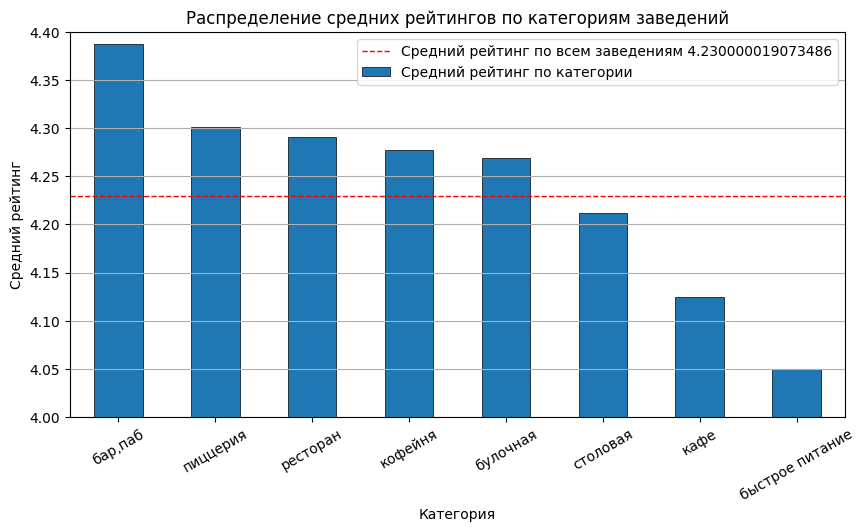

In [ ]:
mean_ratings = df_full.groupby('category')['rating'].mean().sort_values(ascending=False)
ax = mean_ratings.plot(
               kind='bar',
               title=f'Распределение средних рейтингов по категориям заведений',
               legend=True,
               ylabel='Средний рейтинг',
               xlabel='Категория',
               label='Средний рейтинг по категории',
               rot=30,
               figsize=(10, 5),
               edgecolor='black',
               linewidth=0.5
)

# Рассчитываем средний рейтинг среди всех категорий
mean_ratings_share = df_full['rating'].mean()

# Наносим на график линию с медианой рейтинга среди всех категорий
plt.axhline(mean_ratings_share,
            color='red',
            linestyle='--',
            linewidth=1,
            label=f'Средний рейтинг по всем заведениям {round(mean_ratings_share,4)}')

plt.grid(axis='y')
plt.legend()
plt.ylim(4, 4.4) # Устанавливаем минимальные и максимальные значения для оси Y

plt.show()

Для разных типов общепита усредненные рейтинги отличаются незначительно, хоть отличия все же есть. Выше всего средний рейтинг у заведений категории `бар,паб`: 4.388. Самый низкий показатель принадлежит категории `быстрое питание`: 4.05. Как мы видим, разница меньше 10%. Только в трех категориях средние рейтинги ниже среднего рейтинга по всем заведениям: в категриях `столовая`, `кафе` и `быстрое питание`. Возможно, это связано с уровнем сервиса в заведениях этих категорий.
___

### 3.6. Изучим корреляцию между рейтингом и другими показателями

Изучим, с какими данными показывают самую сильную корреляцию рейтинги заведений. Для этого построим и визуализируем матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным.

In [ ]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = df_full[['category', 'district', 'rating', 'chain', 'seats', 'price_category',
                         'is_24_7']].phik_matrix()

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['rating', 'chain', 'seats']
Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating
price_category,0.262056
category,0.198815
district,0.189453
is_24_7,0.161010
chain,0.118785
seats,0.000000


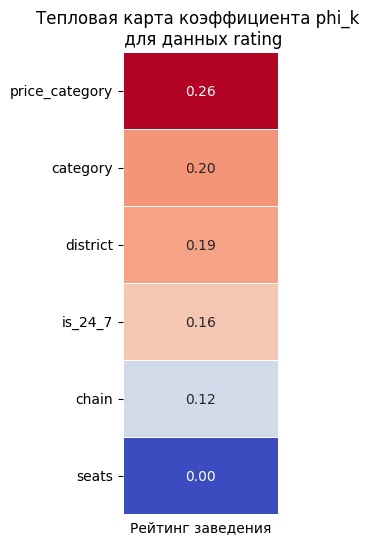

In [ ]:
# Строим тепловую карту
plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции признака rating с другими признаками заведения
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False, # Отключаем цветовую шкалу
            xticklabels=False  # Убираем метки по оси X
           )

# Добавляем заголовок, подпись по оси Х и угол наклона меток по оси Y
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.xlabel('Рейтинг заведения')
plt.yticks(rotation=0)

# Выводим график
plt.show()

Наиболее сильная корелляция рейтинга наблюдается с ценовой категорией заведения. Проверим эту связь с помощью столбчатой диаграмы

/tmp/ipython-input-66-1935501682.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_rating = df_full.groupby('price_category')['rating'].mean().sort_values(ascending=False)


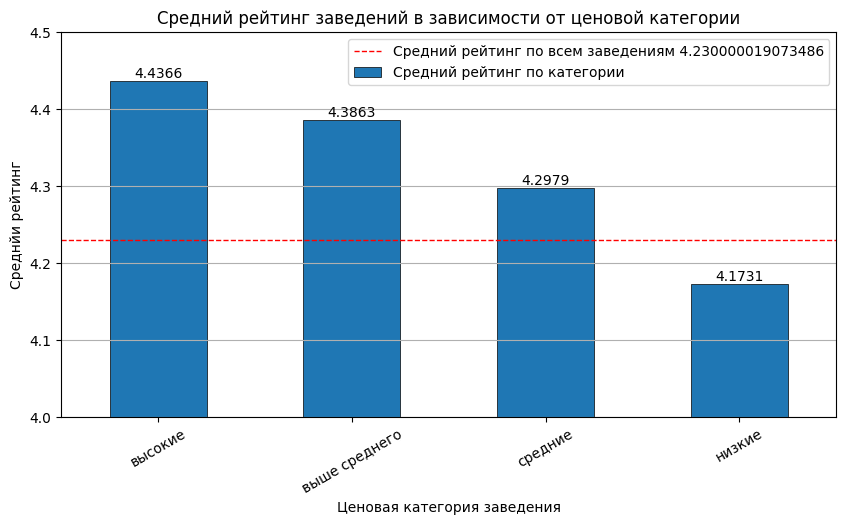

In [ ]:
mean_rating = df_full.groupby('price_category')['rating'].mean().sort_values(ascending=False)
ax = mean_rating.plot(
               kind='bar',
               title=f'Средний рейтинг заведений в зависимости от ценовой категории',
               legend=True,
               ylabel='Среднйи рейтинг',
               xlabel='Ценовая категория заведения',
               label='Средний рейтинг по категории',
               rot=30,
               figsize=(10, 5),
               edgecolor='black',
               linewidth=0.5
)

# Добавление подписей над столбцами
for i, v in enumerate(mean_rating):
    ax.text(i, v, str(round(v,4)), ha='center', va='bottom', fontsize=10)

# Рассчитываем средний рейтинг среди всех категорий
mean_ratings_share = df_full['rating'].mean()

# Наносим на график линию с медианой рейтинга среди всех категорий
plt.axhline(mean_ratings_share,
            color='red',
            linestyle='--',
            linewidth=1,
            label=f'Средний рейтинг по всем заведениям {round(mean_ratings_share,4)}')

plt.grid(axis='y')
plt.legend()
plt.ylim(4, 4.5) # Устанавливаем минимальные и максимальные значения для оси Y

plt.show()

Рейтинг заведения зависит от его ценовой категории. Диаграма показывает, что с убыванием ценовой категории заведний снижается и средний рейтинг заведений по категории. Однако различия снова незначительные: средний рейтинг заведений высокой ценовой категории всего на ~10% выше среднего рейтинга заведений низкой ценовой категории.
___

### 3.7. Изучим топ-15 популярых сетей и их рейтинг

Сгруппируем данные по названиям заведений и категориям и найдем топ-15 популярных сетей в Москве. Для них посчитаем значения среднего рейтинга.

In [ ]:
df_agg = df_full[df_full['chain'] == 1].groupby(['name','category']).agg({
                                                            'id': 'count',
                                                            'rating': 'mean'})
df_agg = df_agg.rename(columns={'id': 'quantity'})
top_15 = df_agg.sort_values(by='quantity', ascending=False).head(15)
top_15

/tmp/ipython-input-67-839819101.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agg = df_full[df_full['chain'] == 1].groupby(['name','category']).agg({


,,quantity,rating
name,category,,
шоколадница,кофейня,119,4.178151
домино'с пицца,пиццерия,76,4.169737
додо пицца,пиццерия,74,4.286487
one price coffee,кофейня,71,4.064789
яндекс лавка,ресторан,69,3.872464
cofix,кофейня,65,4.075385
prime,ресторан,49,4.114285
кофепорт,кофейня,42,4.147619
кулинарная лавка братьев караваевых,кафе,39,4.394872


Визуализируем Топ-15 сетевых заведений по их количеству с помощью горизонтальной стобчатой диаграмы:

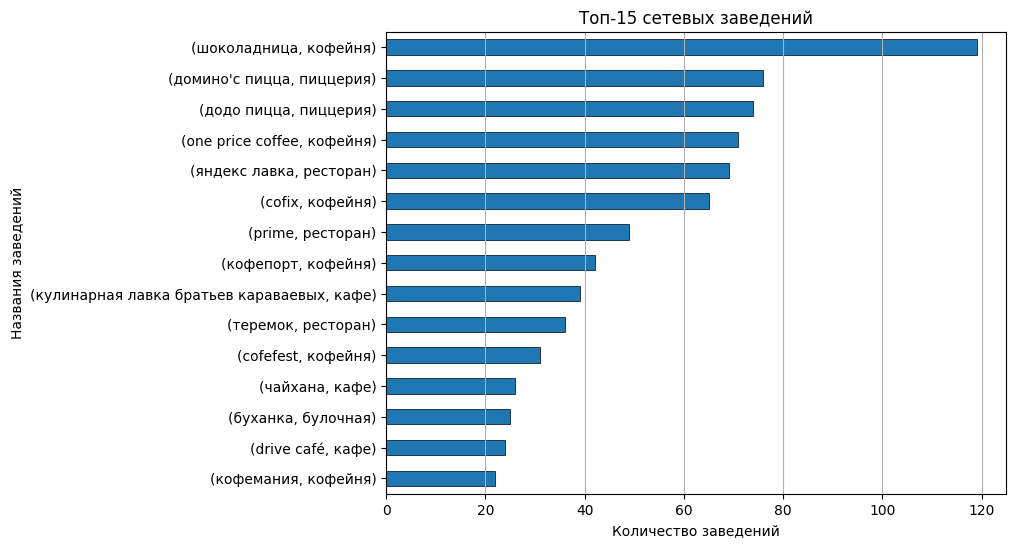

In [ ]:
plt.figure(figsize=(8, 6))

ax = top_15['quantity'].sort_values().plot(
               kind='barh',
               title=f'Топ-15 сетевых заведений',
               legend=False,
               xlabel='Количество заведений',
               ylabel='Названия заведений',
               rot=0,
               #figsize=(10, 7),
               edgecolor='black',
               linewidth=0.5
)

plt.grid(axis='x')

plt.show()

Самая популярная сеть в Москве - кофейня "Шоколадница" со 119 объектами.

Проверим, есть ли связь между количеством точек в сети заведений общественного питания и их рейтингом:

In [ ]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = top_15.phik_matrix()

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для рейтинга')
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['quantity', 'rating']
Корреляционная матрица с коэффициентом phi_k для рейтинга


,rating
quantity,0.818814


Связь есть, и достаточно сильная.

Построим горизонтальную столбцатую диаграму для визуализации распределения рейтингов топ-15 заведений в Москве:

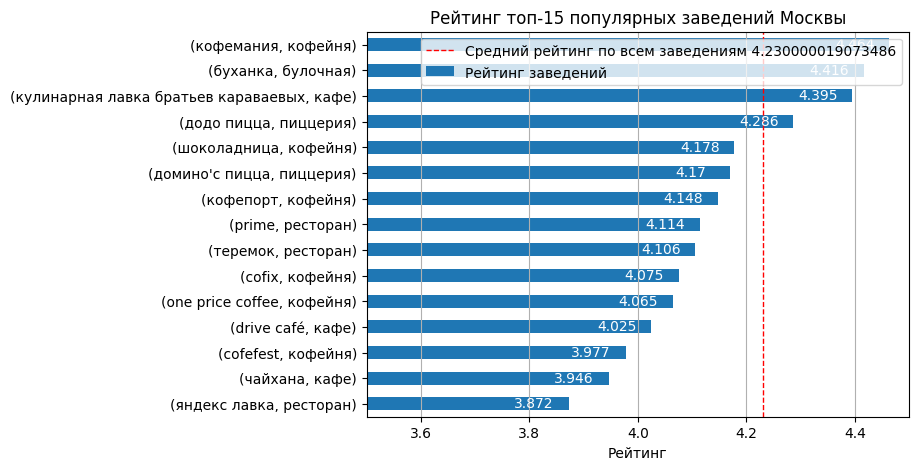

In [ ]:
ax = top_15.sort_values(by='rating')['rating'].plot(kind='barh',
                                         y='name',  # Указываем столбец с названиями заведений
                                         x='rating',
                                         title=f'Рейтинг топ-15 популярных заведений Москвы',
                                         legend=True,
                                         ylabel='',
                                         xlabel='Рейтинг',
                                         label='Рейтинг заведений',
                                         rot=0,
                                         figsize=(7, 5))

# Рассчитываем средний рейтинг среди всех категорий
mean_ratings_share = df_full['rating'].mean()

# Наносим на график линию
plt.axvline(mean_ratings_share,
            color='red',
            linestyle='--',
            linewidth=1,
            label=f'Средний рейтинг по всем заведениям {round(mean_ratings_share,4)}')

for i, v in enumerate(top_15.sort_values(by='rating')['rating']):
    ax.text(v-0.1, i, str(round(v,3)), va='center', ha='left', fontsize=10, color='white')

plt.grid(axis='x')
plt.legend()
plt.xlim(3.5, 4.5)

# Выводим график
plt.show()

Среди 15 самых популярных заведений в Москве по рейтингу лидируют (заведения, чей рейтинг выше среднего по региону):
1) кофейня `кофемания` - 4.464;
2) булочная `буханка` - 4.416;
3) кафе `кулинарная лавка братьев караваевых` - 4.395;
4) пиццерия `додо пицца` - 4.286.

С помощью столбчатой диаграмы изобразим, к каким преимущестренно категориям принадлежат заведения из топ-15 по Москве:

/tmp/ipython-input-71-3713282988.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_15.reset_index().groupby('category')['name'].count().sort_values(ascending=False).plot(


<Axes: title={'center': 'Распределение заведений из топ-15 по категориям'}, xlabel='Категория заведения', ylabel='Количество'>

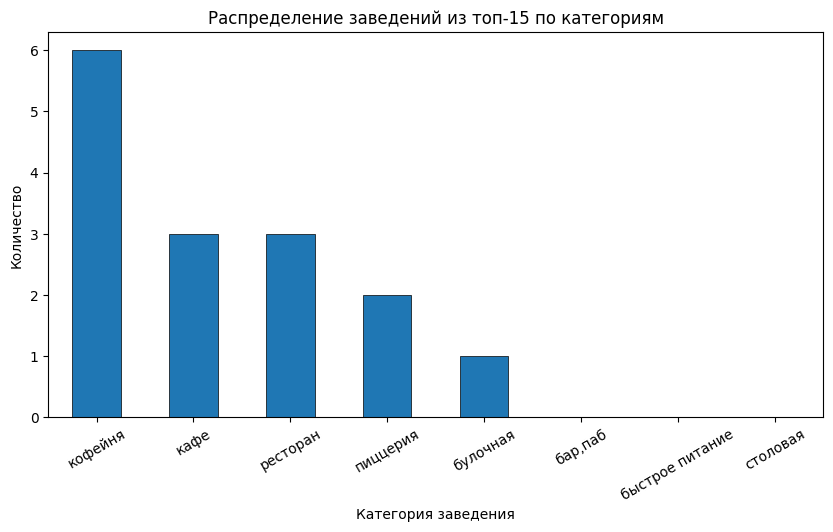

In [ ]:
top_15.reset_index().groupby('category')['name'].count().sort_values(ascending=False).plot(
               kind='bar',
               title=f'Распределение заведений из топ-15 по категориям',
               ylabel='Количество',
               xlabel='Категория заведения',
               rot=30,
               figsize=(10, 5),
               edgecolor='black',
               linewidth=0.5
)

Среди 15 самых популярных заведений в Москве чаще всего встречаются кофейни (6 шт.) и кафе и рестораны (по 3 шт.)
___

### 3.8. Изучение вариации среднего чека заведения

Изучим вариацию среднего чека заведения в зависимости от района Москвы. Проанализируем цены в центральном административном округе и других. Изучим, как удалённость от центра влияет на цены в заведениях.

In [ ]:
# Проанализируем статистические показатели данных по среднему чеку заведений
df_full['middle_avg_bill'].describe()

,middle_avg_bill
count,3149.000000
mean,958.053650
std,1009.734436
min,0.000000
25%,375.000000
50%,750.000000
75%,1250.000000
max,35000.000000


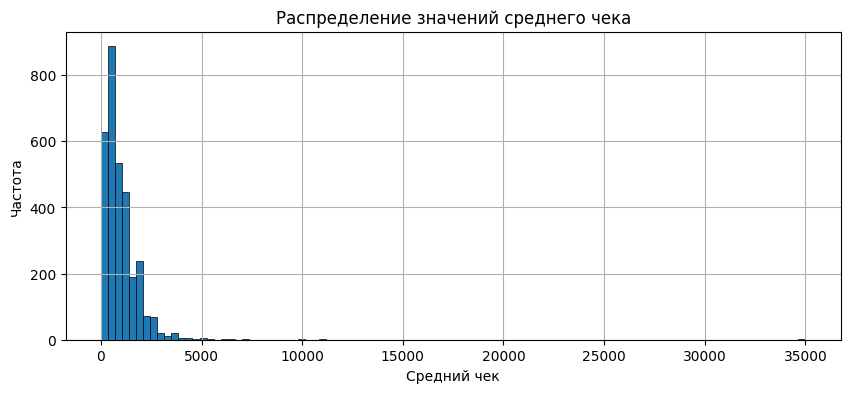

In [ ]:
# Построим гистограму для визуализации распределения значений среднего чека
df_full.hist('middle_avg_bill',
             bins=100,
             edgecolor='black',
             linewidth=0.5,
             figsize=(10,4)
            )
plt.title('Распределение значений среднего чека')
plt.ylabel('Частота')
plt.xlabel('Средний чек')

plt.show()

Очевидно, в данных есть выбросы, посмотрим на них с помощью диаграмы размаха.

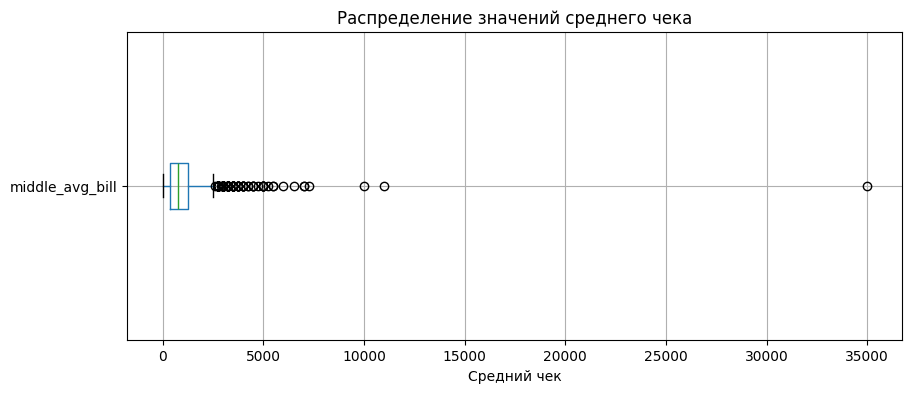

In [ ]:
df_full.boxplot(column='middle_avg_bill', vert=False, grid=True, figsize=(10,4) )
plt.title('Распределение значений среднего чека')
plt.ylabel('')
plt.xlabel('Средний чек')

plt.show()

Значение среднего чека 35000 руб - явный выброс и, возможно, ошибка ввода данных. Мы можем исключить его из гистрограмы, а количество столбцов увеличить, чтобы визуализация была нагляднее. Выбросы значений от 1250 до 11000 руб вполне реалистичны, так как в Москве есть рестораны высокой ценовой категории и заведения с таким средним чеком. Размах распределения 0-35000 - достаточно большой (даже если не принимать во внимание выброс 35000, то размах распределения среднего чего 0-11000 руб). Нулевой средний чек может быть в тех заведениях, которые еще не открылись или данные о среднем счете в которых не предоставлены.

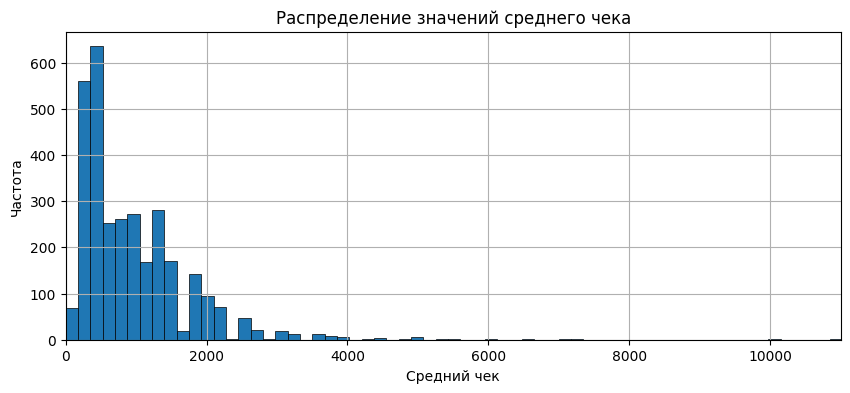

In [ ]:
df_full.hist('middle_avg_bill',
             bins=200,
             edgecolor='black',
             linewidth=0.5,
             figsize=(10,4)
            )
plt.title('Распределение значений среднего чека')
plt.ylabel('Частота')
plt.xlabel('Средний чек')
plt.xlim(0, 11000) # Ограничим ось X от 0 до 11000

plt.show()

Распределение основного количества значений среднего чека лежит в рамках 375-1250 руб и пиковая частотность у значений - около 750 руб. Распределение близко к нормальному, но несимметрично и с ярко выраженным правым хвостом.

In [ ]:
# Посчитаем средний чек по районам Москвы
df_full.groupby('district')['middle_avg_bill'].mean().sort_values(ascending=False)

,middle_avg_bill
district,
Центральный административный округ,1191.057495
Западный административный округ,1053.225464
Северный административный округ,927.959656
Южный административный округ,834.398071
Северо-Западный административный округ,822.222900
Восточный административный округ,820.626953
Юго-Западный административный округ,792.561707
Северо-Восточный административный округ,716.611267
Юго-Восточный административный округ,654.097961


In [ ]:
# Посчитаем медианы среднего чека по районам Москвы
df_full.groupby('district')['middle_avg_bill'].median().sort_values(ascending=False)

,middle_avg_bill
district,
Западный административный округ,1000.0
Центральный административный округ,1000.0
Северо-Западный административный округ,700.0
Северный административный округ,650.0
Юго-Западный административный округ,600.0
Восточный административный округ,575.0
Северо-Восточный административный округ,500.0
Южный административный округ,500.0
Юго-Восточный административный округ,450.0


Построим горизонтальную столбцатую диаграму для визуализации вариации среднего чека и медианы среднего чека по районам Москвы:

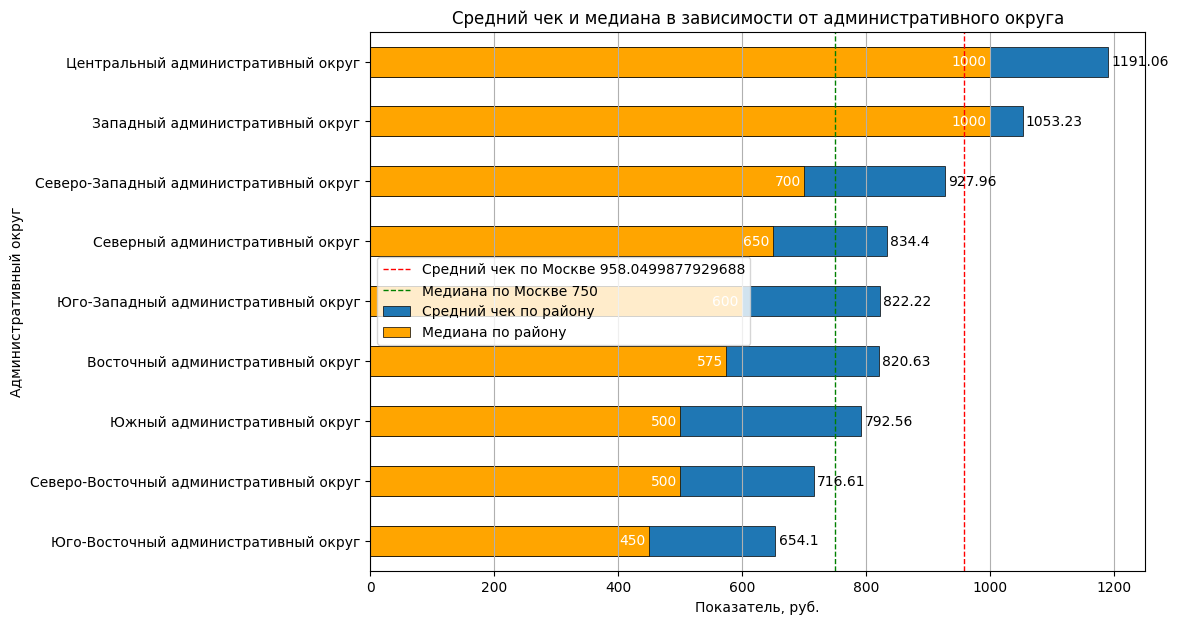

In [ ]:
plt.figure(figsize=(10, 7))

mean_middle_avg_bill = df_full.groupby('district')['middle_avg_bill'].mean().sort_values()
median_middle_avg_bill = df_full.groupby('district')['middle_avg_bill'].median().sort_values()
ax = mean_middle_avg_bill.plot(
               kind='barh',
               label='Средний чек по району',
               rot=0,
               edgecolor='black',
               linewidth=0.5
)

ax = median_middle_avg_bill.plot(
               kind='barh',
               label='Медиана по району',
               rot=0,
               edgecolor='black',
               linewidth=0.5,
               color='orange'
)

# Добавление подписей для столбцов средних чеков
for i, v in enumerate(mean_middle_avg_bill):
    ax.text(v+5, i, str(round(v,2)), va='center', ha='left', fontsize=10, color='black')

# Добавление подписей для столбцов  медиан
for i, v in enumerate(median_middle_avg_bill):
    ax.text(v-5, i, str(round(v)), va='center', ha='right', fontsize=10, color='white')

# Рассчитываем средний чек среди всех районов
mean_middle_avg_bill_msc = df_full['middle_avg_bill'].mean()
median_middle_avg_bill_msc = df_full['middle_avg_bill'].median()

# Наносим на график линию со средним чеком по всему региону
plt.axvline(mean_middle_avg_bill_msc,
            color='red',
            linestyle='--',
            linewidth=1,
            label=f'Средний чек по Москве {round(mean_middle_avg_bill_msc,2)}')

# Наносим на график линию с медианой по всему региону
plt.axvline(median_middle_avg_bill_msc,
            color='green',
            linestyle='--',
            linewidth=1,
            label=f'Медиана по Москве {round(median_middle_avg_bill_msc)}')

plt.grid(axis='x')
plt.legend()
plt.xlabel('Показатель, руб.')
plt.ylabel('Административный округ')
plt.title('Средний чек и медиана в зависимости от административного округа')

plt.show()

Построим график с диаграмами размаха для каждого административного округа, чтобы детальнее проагализировать выбросы.

/tmp/ipython-input-79-2935600890.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='middle_avg_bill',


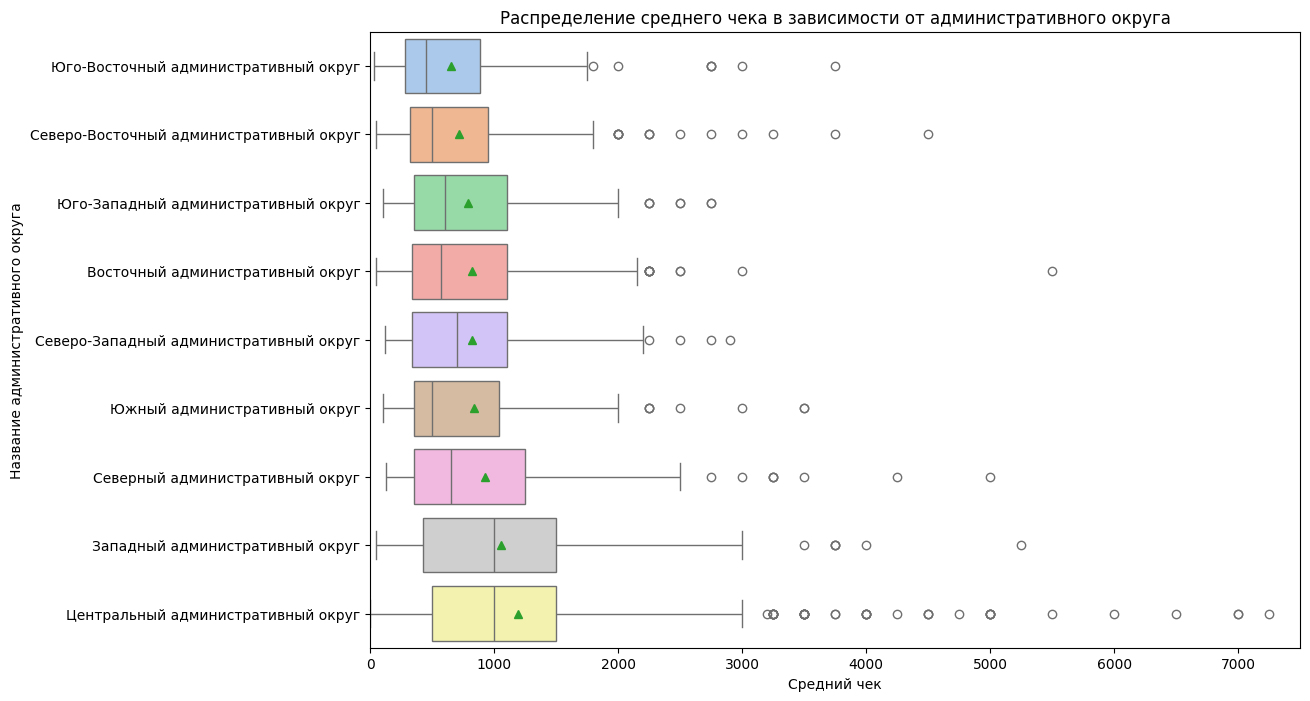

In [ ]:
tmp1 = df_full.copy()  # Создаем копию датасета, чтобы не работать с исходным
mean_middle_avg_bill = tmp1.groupby('district')['middle_avg_bill'].mean().sort_values()

# Создаем список округов, отсортированный по средним чекам
order = mean_middle_avg_bill.index

# Построение диаграммы размаха с использованием seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x='middle_avg_bill',
            y='district',
            data=tmp1,
            showmeans=True,  # Зеленые треугольники показывают среднее значение
            order=order,
            palette='pastel').set(title='Распределение среднего чека в зависимости от административного округа',
                                  xlabel='Средний чек',
                                  ylabel='Название административного округа',
                                  xlim=(0, 7500))

# Отображение диаграммы
plt.show()

Больше всего выбросов в Центральном административном округе. Скорее всего, это связано с тем, что в центре столицы просто больше дорогих заведений с высоким мредним чеком (то есть эти выпросы логичны).
Меньше всего выбросов в Юго-Западном и Восточном административных округах  - это может быть связано, с тем, что средний уровень дохожов населения там более стабильный, что вляет на выбор заведений и средний чек.

Центральный и Западный районы лидируют по среднему чеку (в них показатель выше среднего по Москве: 1191 руб и 1053, соответственно). Это можно объяснить тем, что в Центральном и Западном районах:
- всегда больше туристов;
- живут и работают более обеспеченные слои населения, так как аренда и стоимость жилья там выше, а следовательно, такие люди могут себе позволить более высокий средний чек;
- дороже аренда помещений и, следовательно, выше цены в заведениях.

Половина значений среднего чека в этих районах меньше 1000 руб, а вторая половина - больше. Можно сказать, что по мере удаления от центра , средний чек становится ниже. В Западном районе ситуация немного лучше, чем в других "нецентральных" районах. В Юго-Восточном административном округе медианное значение среднего чека в 2.2 раза ниже, чем в центральном.
___

### Промежуточный вывод
Целью исследовательского анализа было найти наиболее характерные закономерности и взаимосвязи в данных рынка заведений общественного питания Москвы. Для достижения цели стояли задачи проанализировать распределения данных по столбцам, соотношение категорий в категориальных данных и связь рейтннга с другими показателями.

**Результаты исследовательского анализа:**
- Топ-3 категорий заведений: `кафе`, `ресторан` и `кофейня` - эти категории самые популярные. `Столовая` и `булочная` - самые непопулярные категории.
- Больше всего объектов общественного питания находится в `Центральном административном округе Москвы` (2242 шт, или 27%), среди которых преимущественно `рестораны`. Самый малочисленный `Северо-Западный административный округ` - всего 409 заведений (около 5%).
- Чаще всего сетевыми заведениями являются `булочные` (более 60%). А реже всего - `бары,пабы` (22%).
- Выше всего наиболее типичное количество посадочных мест в `ресторане` (86 мест), что логично. А ниже всего - в `булочной` (50 мест). Меньше всего выбросов количества посадочных мест в категориях `столовая`, `быстрое питание` и `булочная`. Вероятно, такие заведения более типичны по своей планировке и формату.
- Выше всего средний рейтинг у заведений категории `бар,паб`: 4.388. Самый низкий показатель принадлежит категории `быстрое питание`: 4.05. В среднем, чем выше ценовая категория заведения, тем выше его рейтинг.
- Среди топ-15 самых популярных сетевых заведений самое крупное - кофейня "Щоколадница" со 119 объектами. А  по рейтингу лидируют: кофейня `кофемания`, булочная `буханка`, кафе `кулинарная лавка братьев караваевых`, пиццерия `додо пицца`. Среди топ-15 чаще всего встречаются `кофейни`, `кафе` и `рестораны`.
- Центральный и Западный районы лидируют по среднему чеку. Возможные причины: здесь больше туристов, живут и работают более обеспеченные слои населения, дороже аренда помещений. А по мере удаления от центра , средний чек становится ниже.

При выполнении раздела основная трудность была в предположении причин тех или иных результатов, которые лежат за пределами имеющихся данных. Мы можем лишь предполагать причины низкого среднего чека в Юго-Восточном административном округе, например.

Чтобы выводы были более обоснованными, можно проанализировать также, данные по населению округов Москвы: плотность населения, средний уровень дохода, семейный статус - чтобы понять связь между этими показателями и популярностью тех или иных категорий заведений, величиной среднего чека и т. д.

## 4. Подведем итоги

В ходе исследования проанализировали данные о 8406 объектах общественного питания в девяти административных округах Москвы. Данные включали информацию о заведенниях и среднем чеке в них.

**Обозначим главные выводы после предобработки данных:**
Предварительно совершили предобработку и удалили 4 строки-дубликата. Заведения могут иметь одинаковые названия, а по одному и тому же адресу может быть несколько заведений. Пропусков в данных было обнаружено значительное количество, поэтому было решено их не удалять, а достоверно заполнить их не представлялось возможным.

В исследовательском анализе данных акцент был сделан на том, чтобы найти взаимосвязи между различными характеристиками заведения и высоким рейтингом, высоким средним чеком. А также выявить аднимистративные округа Москвы и категории заведений с наиболее высокими и низкими показателями, предположив их причины. Было проанализировано:
-  распределение заведений по категориям, по административным районам Москвы, по количеству посадочных мест, по среднему чеку;
-  соотношение сетевых и несетевых заведений в целом и по категориям;
-  средний рейтинг заведений по категориям и связь рейтинга с другими показателями;
-  а также выявить и проанализировать 15 самых популярных заведений в Москве.

**Обозначим главные выводы по исследованиям:**

1) Среди 15 самых популярных заведений в Москве чаще всего встречаются `кофейни` (6 шт.) и `кафе` и `рестораны` (по 3 шт.).
2) Больше всего объектов общественного питания находится в `Центральном административном округе` Москвы. Среди заведений `Центрального административного округа` больше всего `ресторанов` (и в ресторанах обычно больше посадочных мест). К тому же  `Центральный` и `Западный` районы лидируют по среднему чеку.
3) 38% заведений `сетевые`, из них самые популярные - `булочные` с неболоьшим количеством посадочных мест (50 мест).
4) По среднему рейтингу лидирует категория `бар,паб`. При этом *рейтинг заведения зависит от его ценовой категории*, однако разброс значений небольшой - отличие всего в ~10%. А *рейтинг сетевого заведения имеет сильную положительную связь с количеством объектов* в данной сети.

**Рекомендации инвесторам на основе анализа данных:**

1) Если в планах открыть *одно заведение*, то в `Центральном административном округе` (округ с самым высоким средним чеком) выгоднее всего открыть `ресторан` высокой ценовой категории: в ресторанах больше посадочных мест (можно принять больше клиентов за вечер), рестораны в принципе популярны в Москве и входят в топ-15, а также в среднем имеют высокий рейтинг.
2) Если инвесторы рассматривают *запуск сети* не в центре столицы, то рекомендуется рассмотреть крупную сеть `булочных`.

Дополнительно можно провести более детальный анализ по населению разных округов Москвы, если будут соответствующие данные. Можно также проанализировать среднюю стоимоть капучино по административным округам, как это было сделано со средним чеком.